In [6]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [19]:
observations = 100000
xs = np.random.uniform(low = -10, high = 10, size = (observations, 1))
zs = np.random.uniform(low = -10, high = 10, size = (observations, 1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations, 1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs = generated_inputs, targets = generated_targets)

In [20]:
input_size = 2
output_size = 1

In [21]:
inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.float32, [None, output_size])

weights = tf.Variable(tf.random.uniform([input_size, output_size], minval = -0.1, maxval = 0.1,))
biases = tf.Variable(tf.random.uniform([output_size], minval = -0.1, maxval = 0.1))

outputs = tf.matmul(inputs, weights) + biases

In [28]:
mean_loss = tf.losses.mean_squared_error(labels = targets, predictions = outputs) / 2.

optimize  = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(mean_loss)

In [23]:
sess = tf.InteractiveSession()

C:\Users\Owner\anaconda3\lib\site-packages\tensorflow\python\client\session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [29]:
initializer = tf.global_variables_initializer()
sess.run(initializer)

In [30]:
training_data = np.load('TF_intro.npz')

In [31]:
for e in range(100):
    
    _, curr_loss = sess.run([optimize, mean_loss], 
                            feed_dict = {inputs: training_data['inputs'], targets: training_data['targets']}
                           )
    print(curr_loss)

232.1331
217.64192
204.10248
191.45204
179.63223
168.5884
158.2695
148.62784
139.61887
131.20099
123.3353
115.98549
109.11767
102.70008
96.70313
91.09918
85.86234
80.96848
76.39507
72.121
68.12658
64.39343
60.90438
57.64335
54.595364
51.7464
49.08338
46.59408
44.26705
42.091644
40.057884
38.156456
36.37865
34.71635
33.16195
31.708364
30.34896
29.077545
27.88833
26.77591
25.735254
24.761623
23.850628
22.998144
22.200325
21.453573
20.754538
20.100082
19.487274
18.913387
18.37585
17.87228
17.40045
16.95827
16.54379
16.1552
15.790796
15.448985
15.128287
14.827313
14.544772
14.279453
14.030228
13.796038
13.575895
13.368882
13.17414
12.99086
12.81829
12.655727
12.502525
12.35806
12.221765
12.093105
11.971583
11.856727
11.748104
11.645304
11.54795
11.455685
11.368177
11.285115
11.20621
11.13119
11.059806
10.991817
10.927003
10.865159
10.806092
10.74962
10.695579
10.643806
10.594157
10.546501
10.5007
10.456638
10.414204
10.373294
10.333808
10.295655


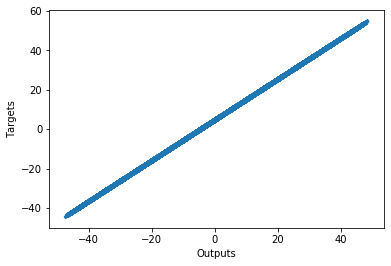

In [32]:
out = sess.run([outputs], feed_dict = {inputs: training_data['inputs']})
plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()